# Process 2018 03 Bathymetry #
New Fraser River, taking 2 m up to 0 to narrow the banks

Take the bathymetry produced by Michael including the better resolved river and process it.
We need to do the following steps:
1. Straighten North Open Boundary
2. Straighten West Open Boundary
3. Check continuity and Add Mixed Islands
3.1 Fix Puget
4. Smooth
4.1 Extra smooth Puget
5. Add shallow Jetty
6. Check dredged River Channel
7. Plot up our Final Bathymetry
8. Write out bathy file and jetty extra friction files
Note: original 201702 processing did Check continuity and add mixed islands and fix Puget after smoothing.

### Set Up

In [1]:
import cmocean.cm as cm 
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import bathy_tools, nc_tools, viz_tools

%matplotlib inline

import matplotlib.colors as matcolors
import matplotlib.cm as cmx

In [2]:
# Plotting Set Up
cmap = cm.deep
cmap.set_bad('darkgreen')
ylim = (47, 51)
xlim = (-126.3, -122.2)
cNorm  = matcolors.Normalize(vmin=0, vmax=14)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='cool')

In [3]:
# function to check depth range
def depth_check(bathy):
    for i in range(bathy.shape[0]):
        for j in range(bathy.shape[1]):
            if bathy[i, j] > 428:
                print ('Deep: ', i, j, bathy[i ,j])
            elif bathy[i, j] < 4 and bathy[i, j] > 0:
                print ('Shallow: ', i, j, bathy[i, j])

### Starting Bathymetry from Michael's Notebook ###

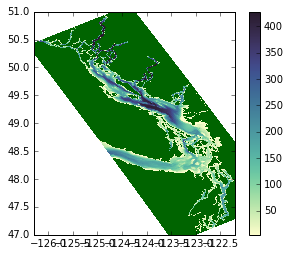

In [4]:
md_bathyfile = nc.Dataset('/home/sallen/MEOPAR/ANALYSIS/analysis-michael/bathymetry/bathy_meter_SalishSea_201803preB.nc')
lon = md_bathyfile.variables['nav_lon']
lat = md_bathyfile.variables['nav_lat']
md_bathy = md_bathyfile.variables['Bathymetry']

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
viz_tools.set_aspect(ax, coords='map')
mesh = ax.pcolormesh(lon[:], lat[:], md_bathy[:], cmap=cmap)
fig.colorbar(mesh, ax=ax)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
depth_check(md_bathy[:])

## Straighten Northern Boundary

In [5]:
ns_bathy = np.copy(md_bathy[:])
js = 37
je = 75

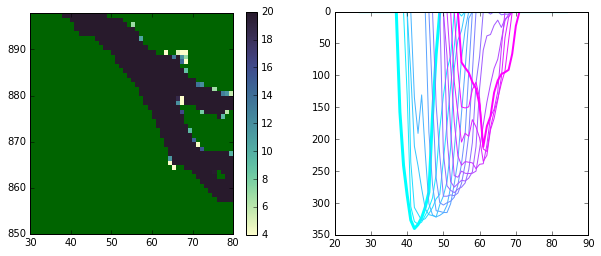

In [6]:
ns_masked = np.ma.masked_array(ns_bathy, ns_bathy == 0)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(ns_masked, cmap=cmap, vmax=20)
fig.colorbar(mesh, ax=axs[0])
axs[0].set_ylim((850, 898))
axs[0].set_xlim((30, 80));

axs[1].plot(range(js-10, je+10), ns_bathy[897, js-10:je+10], color=scalarMap.to_rgba(0), linewidth=3)
for i in range(1, 14):
    axs[1].plot(range(js-10, je+10), ns_bathy[897-i, js-10:je+10], color=scalarMap.to_rgba(i))
axs[1].plot(range(js-10, je+10), ns_bathy[897-14, js-10:je+10], color=scalarMap.to_rgba(14), linewidth=2)
axs[1].invert_yaxis()

In [7]:
init_north = np.array(md_bathy[897, :])
# shift north bathymetry 7 points west
north = np.zeros_like(init_north)
north[js:je] = init_north[js-7:je-7]

#first 6 grid points (0-5) use the same, core profile shifted east.  After that merge into the original
#bathymetry, shifting South by half a grid point per grid point east.

# Closest 5 rows to northern boundary, all the same as the boundary
for i in range(898-5, 898):
    ns_bathy[i, js:je] = north[js:je]
# Now move away from the boundary, blending    

i=5; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js:je] + (i-5)/10.*ns_bathy[ii, js:je]
i=6; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js-1:je-1] + (i-5)/10.*ns_bathy[ii, js:je]
i=7; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js-2:je-2] + (i-5)/10.*ns_bathy[ii, js:je]
i=8; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js-3:je-3] + (i-5)/10.*ns_bathy[ii, js:je]
i=9; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js-4:je-4] + (i-5)/10.*ns_bathy[ii, js:je]
i=10; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js-5:je-5] + (i-5)/10.*ns_bathy[ii, js:je]
i=11; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js-6:je-6] + (i-5)/10.*ns_bathy[ii, js:je]
i=12; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js-7:je-7] + (i-5)/10.*ns_bathy[ii, js:je]
i=13; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js-8:je-8] + (i-5)/10.*ns_bathy[ii, js:je]
i=14; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js-9:je-9] + (i-5)/10.*ns_bathy[ii, js:je]

In [8]:
# Remove shallow points, deepen points almost at 4
for i in range(880,898):
    for j in range(30,80) :
        if ns_bathy[i, j] < 2:
            ns_bathy[i, j] = 0
        elif ns_bathy[i, j] < 4:
            ns_bathy[i, j] = 4

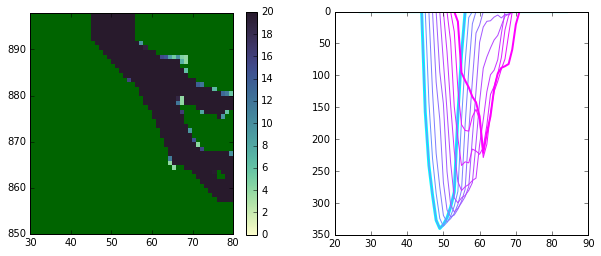

In [9]:
ns_masked = np.ma.masked_array(ns_bathy, ns_bathy == 0)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(ns_masked, cmap=cmap, vmax=20, vmin=0)
fig.colorbar(mesh, ax=axs[0])
axs[0].set_ylim((850, 898))
axs[0].set_xlim((30, 80));

axs[1].plot(range(js-10, je+10), ns_bathy[897, js-10:je+10], color=scalarMap.to_rgba(0), linewidth=3)
for i in range(1, 14):
    axs[1].plot(range(js-10, je+10), ns_bathy[897-i, js-10:je+10], color=scalarMap.to_rgba(i))
axs[1].plot(range(js-10, je+10), ns_bathy[897-14, js-10:je+10], color=scalarMap.to_rgba(14), linewidth=2)
axs[1].invert_yaxis()
depth_check(ns_masked[:])

## Straighten Western Boundary

In [10]:
ws_bathy = np.copy(ns_bathy[:])
iss = 350
iee = 470

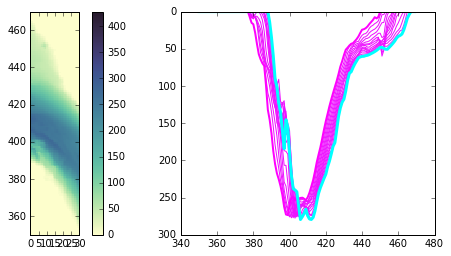

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(ws_bathy, cmap=cmap)
fig.colorbar(mesh, ax=axs[0])
axs[0].set_ylim((350, 470))
axs[0].set_xlim((0, 30));

for j in range(1, 14):
    axs[1].plot(range(iss, iee), ws_bathy[iss:iee, j], color=scalarMap.to_rgba(i))
axs[1].plot(range(iss, iee), ws_bathy[iss:iee, 14], color=scalarMap.to_rgba(14), linewidth=2)
axs[1].plot(range(iss, iee), ws_bathy[iss:iee, 0], color=scalarMap.to_rgba(0), linewidth=3)

axs[1].invert_yaxis()

Unlike the North, the mouth profile is kind of jagged.  
A. We'll take out the bank to the south by rearranging the profile and  
B. We'll rearrange the depths in the centre, so that they are a simple up and down: i.e. make the two deep channels into one. At the same time, move the deepest point, one point to the south. This emphasizes the southern channel, which is the channel that continues into Juan de Fuca. We do this so there is no artifical sill in this channel which is not seen in the original bathymetry.

In [12]:
core = np.copy(ws_bathy[:,0])
print (core[iss+43:iss+53])

[ 101.66333008  123.25875854  135.02902052  159.55469259  184.36438497
  145.40374451  155.01451874  191.34469096  220.07521057  238.04792531]


In [13]:
# A. remove bank
core[iss+46] = ws_bathy[iss+48,0]
core[iss+47] = ws_bathy[iss+49,0]
core[iss+48] = ws_bathy[iss+46,0]
core[iss+49] = ws_bathy[iss+47,0]
print (core[iss+43:iss+53])

[ 101.66333008  123.25875854  135.02902052  145.40374451  155.01451874
  159.55469259  184.36438497  191.34469096  220.07521057  238.04792531]


In [14]:
print (core[401:420])

[ 220.07521057  238.04792531  239.73733351  242.15959676  261.67866177
  279.46614583  275.8232371   271.60856289  265.43810696  274.51956685
  278.7413737   279.39492289  276.5459849   267.96089851  255.51526896
  244.19440884  236.64743296  230.45999908  224.22202131]


In [15]:
# B. Fix central channel
core[402] = ws_bathy[403,0]
core[403] = ws_bathy[405,0]
core[404] = ws_bathy[407,0]
core[405] = ws_bathy[406,0]
core[406] = ws_bathy[412,0]
core[407] = ws_bathy[411,0]
core[408] = ws_bathy[413,0] 
core[409] = ws_bathy[410,0]
core[410] = ws_bathy[408,0]
core[411] = ws_bathy[414,0]
core[412] = ws_bathy[409,0]
core[413] = ws_bathy[415,0]
core[414] = ws_bathy[416,0]
core[415] = ws_bathy[404,0]
core[416] = ws_bathy[417,0]
core[417] = ws_bathy[402,0]
print (core[402:417])

[ 239.73733351  261.67866177  275.8232371   279.46614583  279.39492289
  278.7413737   276.5459849   274.51956685  271.60856289  267.96089851
  265.43810696  255.51526896  244.19440884  242.15959676  236.64743296]


In [16]:
print (core[iss+37:iss+40])
print (core[iee-4:iee-1])


[  0.           0.          13.97926807]
[ 4.  0.  0.]


In [17]:
# smooth the west profile, twice
newcore = core
for i in range(iss,iee):
    newcore[i] = 0.25*core[i-1] + 0.5*core[i] + 0.25*core[i+1]
core[:] = newcore
for i in range(360,500):
    newcore[i] = 0.25*core[i-1] + 0.5*core[i] + 0.25*core[i+1]
core[:] = newcore
# rezero iss+37 and iss+38 as we do not want to expand the domain
core[0:iss+38+1] = 0
# rezero iee-4, iee-3,iee-2 as we do not want to expand the domain
print (core[iee-4:iee])
core[iee-3:] = 0
# this domain goes one grid point further north than previous, zero iee-4
core[iee-4] = 0.

[ 5.01224403  1.87385658  0.62366304  0.1904044 ]


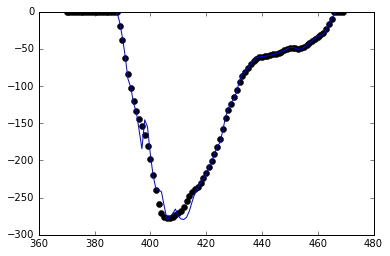

In [18]:
plt.plot(range(370,470),-core[370:470],'ko',range(370,470),-ws_bathy[370:470,0],'-');

We now have "core" which is the bathymetry at the mouth.  This continues 5 more grid points into the domain.  Beyond that we blend into the original bathymetry linearly over the next 10 grid points.  The only difficulty is that we need to follow the bathymetry south-east, so we need to shift south as we go.

In [19]:
for i in range(0,5):
    ws_bathy[370:470,i] = core[370:470]
i=5
ws_bathy[370:470,i] = (-i+15)/10.*core[370:470] + (i-5)/10.*ws_bathy[370:470,i]
i=6
ws_bathy[370:470,i] = (-i+15)/10.*(core[370:470]+core[371:471])/2. + (i-5)/10.*ws_bathy[370:470,i]
i=7
ws_bathy[370:470,i] = (-i+15)/10.*core[371:471] + (i-5)/10.*ws_bathy[370:470,i]
i=8
ws_bathy[370:470,i] = (-i+15)/10.*(core[371:471]+core[372:472])/2. + (i-5)/10.*ws_bathy[370:470,i]
i=9
ws_bathy[370:470,i] = (-i+15)/10.*core[372:472] + (i-5)/10.*ws_bathy[370:470,i]
i=10
ws_bathy[370:470,i] = (-i+15)/10.*(core[372:472]+core[373:473])/2. + (i-5)/10.*ws_bathy[370:470,i]
i=11
ws_bathy[370:470,i] = (-i+15)/10.*core[373:473] + (i-5)/10.*ws_bathy[370:470,i]
i=12
ws_bathy[370:470,i] = (-i+15)/10.*(core[373:473]+core[374:474])/2. + (i-5)/10.*ws_bathy[370:470,i]
i=13
ws_bathy[370:470,i] = (-i+15)/10.*core[374:474] + (i-5)/10.*ws_bathy[370:470,i]
i=14
ws_bathy[370:470,i] = (-i+15)/10.*(core[374:474]+core[375:475])/2. + (i-5)/10.*ws_bathy[370:470,i]


In [20]:
# We have introduced depths that are between 0 and 4.  Choose one or the other
for i in range(iss, iee):
    for j in range (50):
        if ws_bathy[i, j] > 0 and ws_bathy[i, j] < 2 :
            print (i, j, ws_bathy[i, j], 'low')
            ws_bathy[i, j] = 0
        elif ws_bathy[i, j] >= 2 and ws_bathy[i, j] < 4:
            print (i, j, ws_bathy[i, j], 'high')
            ws_bathy[i, j] = 4
            

378 13 3.2 high
379 9 2.07664019267 high
379 10 3.868070364 high
379 11 3.79885959625 high
380 8 1.36009497643 low
380 9 3.66790523529 high
380 12 2.8 high
381 8 1.2 low
381 9 2.53186629613 high
381 10 3.00394312541 high
381 11 3.95879554749 high
382 9 2.51634407043 high
383 9 3.73775005341 high
384 8 1.29527025223 low
385 7 0.8 low
385 8 3.45876436234 high
386 6 0.466183137894 low
386 7 1.9085439682 low
387 6 1.58799991608 low
454 14 3.78372546744 high
455 14 3.50990051492 high
456 14 3.28561555284 high
457 14 3.02280815755 high
458 14 2.60460532033 high
459 14 2.00904258085 high
460 13 3.34681415368 high
460 14 1.3425158841 low
461 13 2.02324938272 high
461 14 0.50581234568 low
462 12 1.51743703704 low
463 10 2.5290617284 high
464 8 3.54068641976 high


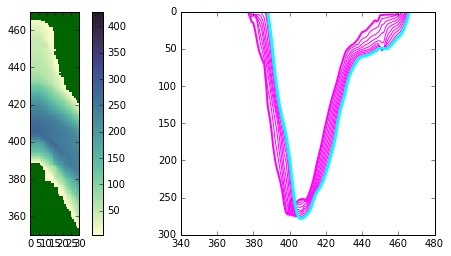

In [21]:
ws_masked = np.ma.masked_array(ws_bathy, ws_bathy == 0)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(ws_masked, cmap=cmap)
fig.colorbar(mesh, ax=axs[0])
axs[0].set_ylim((350, 470))
axs[0].set_xlim((0, 30));

for j in range(1, 14):
    axs[1].plot(range(iss, iee), ws_bathy[iss:iee, j], color=scalarMap.to_rgba(i))
axs[1].plot(range(iss, iee), ws_bathy[iss:iee, 14], color=scalarMap.to_rgba(14), linewidth=2)
axs[1].plot(range(iss, iee), ws_bathy[iss:iee, 0], color=scalarMap.to_rgba(0), linewidth=3)

axs[1].invert_yaxis()
depth_check(ws_masked[:])

there is too much extra shallow water in the North.  We can't get rid of all of it, it is partially due to the direct Eastward extension of the boundary, but we can crop some.

In [22]:
top=470
bot=440
left = 3
right = 30

ws_bathy[bot+26,3+left:12+left] = 0
ws_bathy[bot+25,5+left:12+left] = 0
ws_bathy[bot+24,6+left:12+left] = 0
ws_bathy[bot+23,7+left:12+left] = 0
ws_bathy[bot+22,8+left:12+left] = 0
ws_bathy[bot+21,9+left:12+left] = 0
ws_bathy[bot+20,10+left:13+left] = 0
ws_bathy[bot+15:bot+20,11+left:13+left] = 0
ws_bathy[bot+11:bot+15,12+left:14+left] = 0


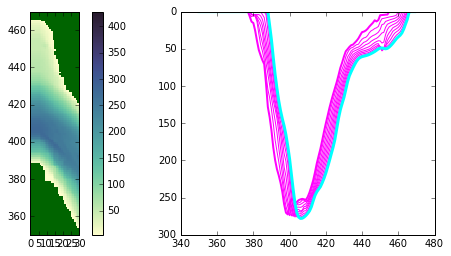

In [23]:
ws_masked = np.ma.masked_array(ws_bathy, ws_bathy == 0)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(ws_masked, cmap=cmap)
fig.colorbar(mesh, ax=axs[0])
axs[0].set_ylim((350, 470))
axs[0].set_xlim((0, 30));

for j in range(1, 14):
    axs[1].plot(range(iss, iee), ws_bathy[iss:iee, j], color=scalarMap.to_rgba(i))
axs[1].plot(range(iss, iee), ws_bathy[iss:iee, 14], color=scalarMap.to_rgba(14), linewidth=2)
axs[1].plot(range(iss, iee), ws_bathy[iss:iee, 0], color=scalarMap.to_rgba(0), linewidth=3)

axs[1].invert_yaxis()
depth_check(ws_masked[:])

### Fix the bump, centre of so many NaN's ###

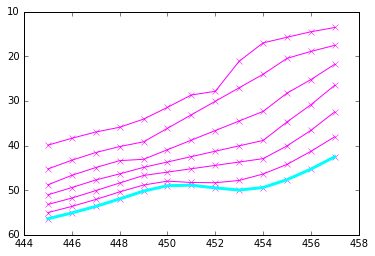

In [24]:
w = 0.2
for i in range(450, 454):
    ip = i-449
    for j in range(7, 11):
        ws_bathy[i, j] =  w*(5-ip)*ws_bathy[449, j] + w*ip*ws_bathy[454, j]
iii, ijj = 445, 458
fig, ax = plt.subplots(1, 1)
for j in range(5, 12):
    ax.plot(range(iii, ijj), ws_bathy[iii:ijj, j], 'x-', color=scalarMap.to_rgba(i))
#axs[1].plot(range(iss, iee), ws_bathy[iss:iee, 14], color=scalarMap.to_rgba(14), linewidth=2)
ax.plot(range(iii, ijj), ws_bathy[iii:ijj, 5], color=scalarMap.to_rgba(0), linewidth=3)

ax.invert_yaxis()

## Check continuity and Add Missed Islands

In [25]:
oc_bathy = np.copy(ws_bathy)

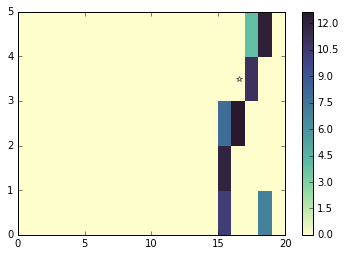

In [26]:
plt.pcolormesh(oc_bathy[35:40, 100: 120], cmap=cmap)
plt.plot(116-100+0.5, 38-35+0.5, 'w*')
plt.colorbar()

oc_bathy[38, 116] = 0.5*(oc_bathy[38, 117] + oc_bathy[37, 116])

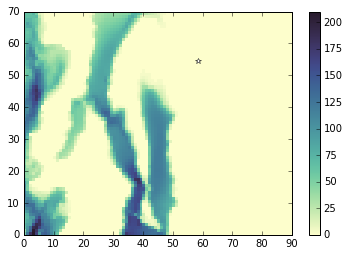

In [27]:
plt.pcolormesh(oc_bathy[140:210, 260:350], cmap=cmap)
plt.plot(318-260+0.5, 194-140+0.5, 'w*')
plt.colorbar()
# Not relevant
#oc_bathy[194, 318] = 0.5*(oc_bathy[193, 318] + oc_bathy[195, 318])

0.0


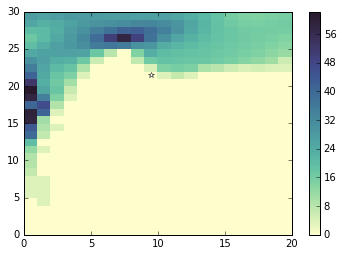

In [28]:
imin, imax = 250, 280
jmin, jmax = 330, 350
ii, jj = 271, 339
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap)
plt.plot(jj-jmin+0.5, ii-imin+0.5, 'w*')
print (oc_bathy[ii, jj])
plt.colorbar()
# not relevant
#oc_bathy[271, 339] = 0.

0.0


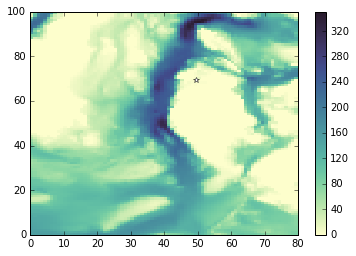

In [29]:
imin, imax = 250, 350
jmin, jmax = 200, 280
ii, jj = 319, 249
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap)
plt.plot(jj-jmin+0.5, ii-imin+0.5, 'w*')
print (oc_bathy[ii, jj])
plt.colorbar()
# not relevant
# oc_bathy[319, 249] = 0.5*(oc_bathy[318, 249] + oc_bathy[320, 249])

4.18988180161


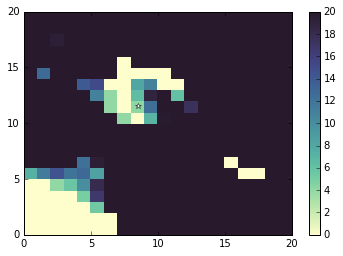

In [30]:
imin, imax = 320, 340
jmin, jmax = 300, 320
ii, jj = 331, 308
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=20)
plt.plot(jj-jmin+0.5, ii-imin+0.5, 'w*')
print (oc_bathy[ii, jj])
plt.colorbar()
oc_bathy[331, 308] = 0.

[ 19.5         10.47832     21.97062913]


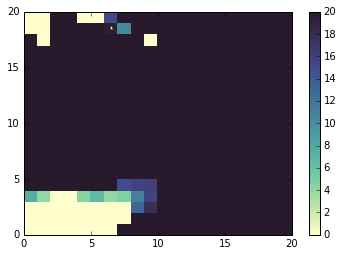

In [31]:
# End of Saturna Island
imin, imax = 330, 350
jmin, jmax = 280, 300
ii, jj = 348, 286
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=20)
plt.plot(jj-jmin+0.5, ii-imin+0.5, 'w*')
print (oc_bathy[ii, jj:jj+3])
plt.colorbar()
oc_bathy[348, 286:289] = 0.

[ 34.20848729   7.07451466]


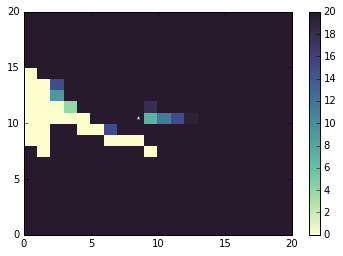

In [32]:
# Tumbo Island
imin, imax = 340, 360
jmin, jmax = 280, 300
ii, jj = 350, 288
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=20)
plt.plot(jj-jmin+0.5, ii-imin+0.5, 'w*')
print (oc_bathy[ii, jj:jj+2])
plt.colorbar()
oc_bathy[350, 288:290] = 0.
oc_bathy[351, 287:289] = 0.
oc_bathy[352, 286] = 0.
oc_bathy[353, 285] = 0.

[ 15.65010373  19.81978374]
[ 7.96354824  7.09524647]
7.63456318114


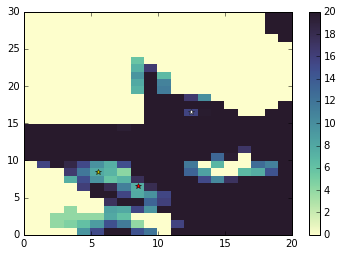

In [33]:
# Russell Island near Fulford Harbour
# Piers Island near Swartz Bay
# Knapp Island near Swartz Bay
imin, imax = 350, 380
jmin, jmax = 220, 240
ii, jj = 366, 232
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=20)
plt.plot(jj-jmin+0.5, ii-imin+0.5, 'w*')
print (oc_bathy[ii, jj:jj+2])
ii, jj = 358, 225
plt.plot(jj-jmin+0.5, ii-imin+0.5, 'y*')
print (oc_bathy[ii, jj:jj+2])
ii, jj = 356, 228
plt.plot(jj-jmin+0.5, ii-imin+0.5, 'r*')
print (oc_bathy[ii, jj])
plt.colorbar()
oc_bathy[366, 232:234] = 0.
oc_bathy[358, 225:227] = 0
oc_bathy[356, 228] = 0.

[  4.01945455  10.08857708  11.3837    ]


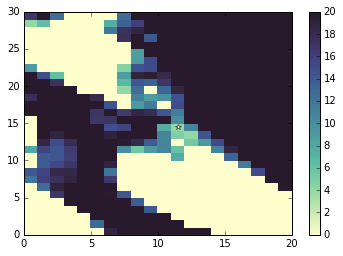

In [34]:
# Samuel Island north end of Saturna
imin, imax = 350, 380
jmin, jmax = 260, 280
ii, jj = 364, 271
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=20)
plt.plot(jj-jmin+0.5, ii-imin+0.5, 'w*')
print (oc_bathy[ii:ii+3, jj])
plt.colorbar()
oc_bathy[364:367, 271] = 0.
oc_bathy[368, 269] = 0.

0.0


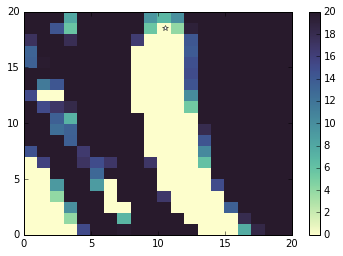

In [35]:
# end of Galiano
imin, imax = 410, 430
jmin, jmax = 230, 250
ii, jj = 428, 240
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=20)
plt.plot(jj-jmin+0.5, ii-imin+0.5, 'w*')
print (oc_bathy[ii, jj])
plt.colorbar()
# not needed
# oc_bathy[428, 240] = 0.

[ 4.05913749  5.95162412  7.52014806]


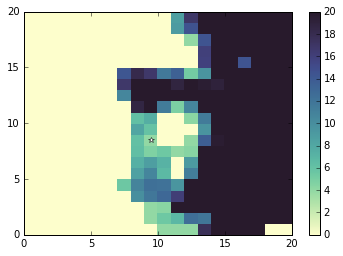

In [36]:
# Newcastle Island
imin, imax = 480, 500
jmin, jmax = 200, 220
ii, jj = 488, 209
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=20)
plt.plot(jj-jmin+0.5, ii-imin+0.5, 'w*')
print (oc_bathy[ii:ii+3, jj])
plt.colorbar()
oc_bathy[488:491, 209] = 0.

5.094


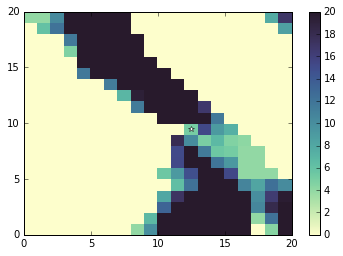

In [37]:
# Mudge Island
imin, imax = 460, 480
jmin, jmax = 210, 230
ii, jj = 469, 222
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=20)
plt.plot(jj-jmin+0.5, ii-imin+0.5, 'w*')
print (oc_bathy[ii, jj])
plt.colorbar()
oc_bathy[469, 222] = 0.
oc_bathy[468, 223] = 0.
oc_bathy[467, 224] = 0.
oc_bathy[466, 225:227] = 0.
oc_bathy[465, 226] = 0.

[ 4.  4.]


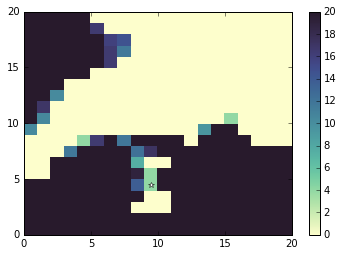

In [38]:
# Twin Islands near Hernando
imin, imax = 720, 740
jmin, jmax = 160, 180
ii, jj = 724, 169
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=20)
plt.plot(jj-jmin+0.5, ii-imin+0.5, 'w*')
print (oc_bathy[ii:ii+2, jj])
plt.colorbar()
oc_bathy[724:726, 169] = 0.

0.0


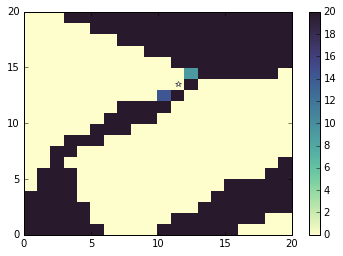

In [39]:
# Between West and East Redondo
imin, imax = 750, 770
jmin, jmax = 210, 230
ii, jj = 763, 221
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=20)
plt.plot(jj-jmin+0.5, ii-imin+0.5, 'w*')
print (oc_bathy[ii, jj])
plt.colorbar()
oc_bathy[763, 221] = 0.5*(oc_bathy[762, 221] + oc_bathy[763, 222])

0.0


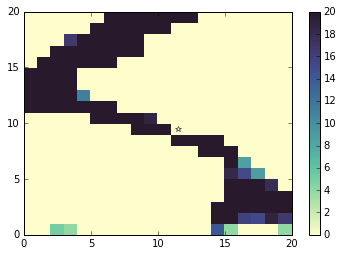

In [40]:
# North of West thurlow
imin, imax = 840, 860
jmin, jmax = 120, 140
ii, jj = 849, 131
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=20)
plt.plot(jj-jmin+0.5, ii-imin+0.5, 'w*')
print (oc_bathy[ii, jj])
plt.colorbar()
oc_bathy[849, 131] = 0.5*(oc_bathy[849, 130] + oc_bathy[848, 131])

0.0


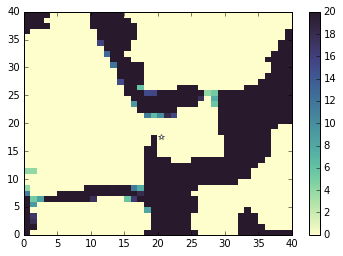

In [41]:
# Stuart Island
imin, imax = 790, 830
jmin, jmax = 160, 200
ii, jj = 807, 180
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=20)
plt.plot(jj-jmin+0.5, ii-imin+0.5, 'w*')
print (oc_bathy[ii, jj])
plt.colorbar()
# not relevent
# oc_bathy[807, 180] = 0.5*(oc_bathy[807, 179] + oc_bathy[808, 180])

202.565818787


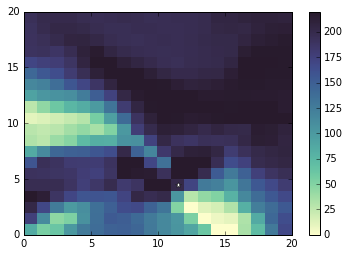

In [42]:
# Boundary Pass Smoothing
imin, imax = 340, 360
jmin, jmax = 290, 310
ii, jj = 344, 301
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=220)
plt.plot(jj-jmin+0.5, ii-imin+0.5, 'w*')
print (oc_bathy[ii, jj])
plt.colorbar()
oc_bathy[344, 301] = 0.5*(oc_bathy[345, 301] + oc_bathy[344, 300])

In [43]:
depth_check(oc_bathy[:])

### 7. Fix Puget

In [44]:
ps_bathy = np.copy(oc_bathy[:])

8.56940905253


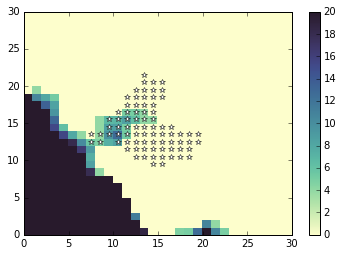

In [45]:
# Snohomish river mouth
Fill = [(309,145),(309,144),(310,148),(310,147),(310,146),(310,145),(310,144),(310,143),(310,142),(311,148),(311,147),(311,146),(311,145),(311,144),
        (311,143),(311,142),(311,141),(312,149),(312,148),(312,147),(312,146),(312,145),(312,144),(312,143),(312,142),(312,141),(312,140),(312,138),
        (312,137),(313,149),(313,148),(313,147),(313,146),(313,145),(313,144),(313,143),(313,142),(313,141),(313,140),(313,138),(313,137),(314,146),
        (314,145),(314,144),(314,143),(314,142),(314,141),(314,139),(315,144),(315,143),(315,142),(315,140),(315,139),(316,144),(316,143),(316,141),
        (316,140),(317,144),(317,143),(317,142),(317,141),(313,139),(314,140),(315,141),(316,142),(318,145),(318,144),(318,143),(318,142),(319,145),
        (319,144),(319,143),(319,142),(320,145),(320,144),(320,143),(321,143),(318,141)]
imin, imax = 300, 330
jmin, jmax = 130, 160
ii, jj = 309, 137
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=20)
for iii, jjj in Fill:
    plt.plot(jjj-jmin+0.5, iii-imin+0.5, 'w*')
print (oc_bathy[ii, jj])
plt.colorbar()
# don't add this

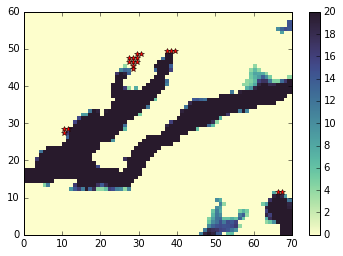

In [46]:
#Dabob bay 
# Note these are all inverted i j!!!
Fill = [(198,145),(198,146),(197,146),(199,146),(199,147),(198,147),(197,147),(199,148),(200,148),(198,144),(208,149),(209,149),
        (207,149),(236,111),(237,111),(180,127),(180,128),(181,128)]
imin, imax = 100, 160
jmin, jmax = 170, 240
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=20)
for jjj,iii in Fill:
    plt.plot(jjj-jmin+0.5, iii-imin+0.5, 'r*')
plt.colorbar()
# don't add this

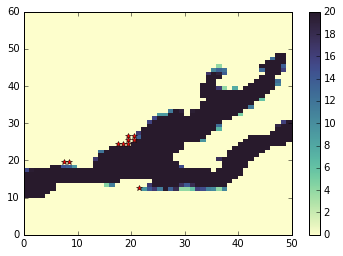

In [47]:
# Near Brinnon and Seabeck
# and these are inverted too!
Fill = [(168,119),(167,119),(177,124),(178,124),(179,124),(179,125),(180,125),(180,126),(179,126),(181,112)]
imin, imax = 100, 160
jmin, jmax = 160, 210
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=20)
for jjj,iii in Fill:
    plt.plot(jjj-jmin+0.5, iii-imin+0.5, 'r*')
plt.colorbar()
# don't add this

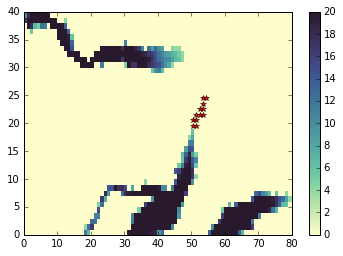

In [48]:
# North Bay
# and these are inverted too!
Fill = [(150,59),(150,60),(151,60),(151,59),(152,61),(152,62),(151,61),(153,61),(153,62),(153,63),(153,64),(154,64)]
imin, imax = 40, 80
jmin, jmax = 100, 180
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=20)
for jjj,iii in Fill:
    plt.plot(jjj-jmin+0.5, iii-imin+0.5, 'r*')
plt.colorbar()
# don't add this

In [49]:
ps_masked = np.ma.masked_array(ps_bathy, ps_bathy == 0)

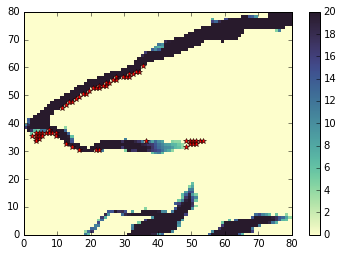

In [50]:
# Down towards Skokomish
Fill2 = [(135,100),(134,98),(133,98),(132,97),(131,97),(131,96),(130,96),(129,96),(127,96),(127,95),(126,95),(125,94),(124,94),(124,93),
         (123,93),(122,93),(122,92),(121,92),(120,92),(119,91),(118,90),(117,90),(116,89),(115,88),(114,87),(113,87),(112,86),(111,85),(107,77),
         (109,76),(108,76),(109,75),(106,76),(105,76),(104,76),(103,76),(102,75),(103,75),(104,75),(105,75),(104,74),(103,74),(103,73),(112,72),
         (114,71),(116,70),(121,70),(122,70),(148,73),(149,73),(150,73),(151,73),(152,73),(153,73),(149,72),(148,71),(150,72),(151,72),(136,73),(107,76)]
imin, imax = 40, 120
jmin, jmax = 100, 180
plt.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=20)
for jjj,iii in Fill2:
    plt.plot(jjj-jmin+0.5, iii-imin+0.5, 'r*')
plt.colorbar()
# don't add this

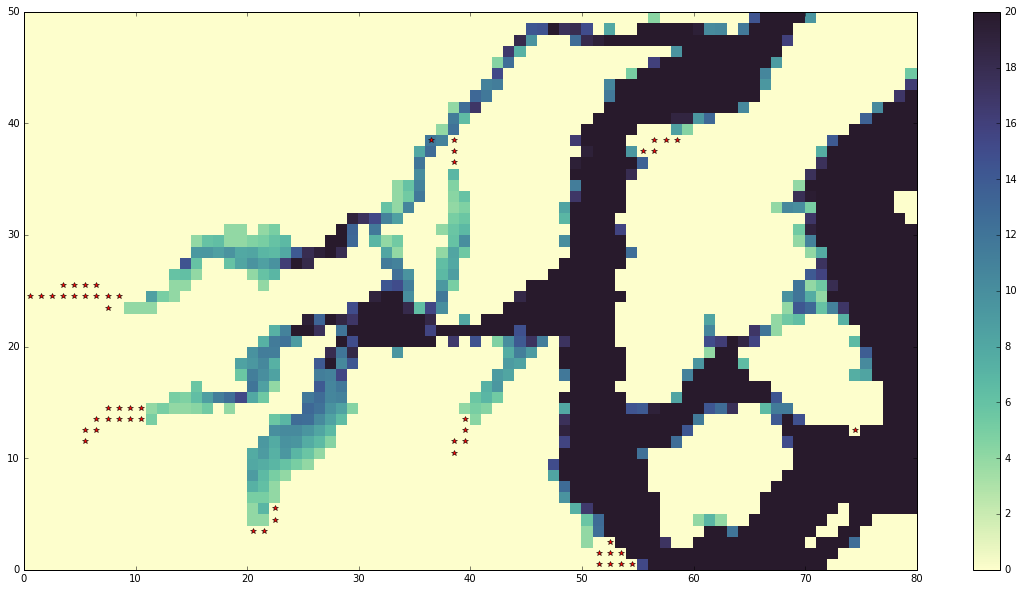

In [51]:
# Southern most edge of Puget Sound (Budd Inlet, Oyster Bay, etc)
Fill2 = [(90,13),(90,14),(89,14),(88,14),(88,13),(89,13),(87,13),(86,13),(86,12),(87,14),(85,11),(85,12),(87,23),(87,24),(88,24),
          (86,24),(86,25),(85,25),(85,24),(84,24),(84,25),(83,25),(83,24),(82,24),(81,24),(80,24),(119,13),(119,12),(119,11),(118,11),
          (118,10),(100,3),(101,3),(102,4),(102,5),(131,1),(132,1),(132,2),(133,1),(132,0),(133,0),(134,0),(131,0),(154,12),(135,37),
          (136,37),(136,38),(137,38),(138,38),(118,37),(118,36),(116,38),(118,38)]
imin, imax = 0, 50
jmin, jmax = 80, 160
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
mesh = ax.pcolormesh(oc_bathy[imin:imax, jmin:jmax], cmap=cmap, vmax=20)
for jjj,iii in Fill2:
    ax.plot(jjj-jmin+0.5, iii-imin+0.5, 'r*')
fig.colorbar(mesh)
# don't need these

49.1261 -123.774


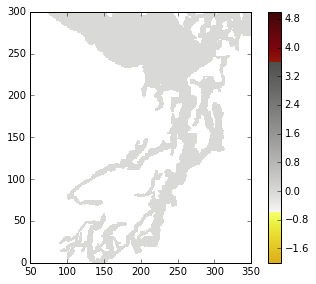

In [52]:
di = 300; dj=300
imin= 0; jmin = 50
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(ps_masked[:] - oc_bathy[:], cmap=cm.oxy_r, vmax=5., vmin=-2)
fig.colorbar(mesh, ax=ax)
ax.set_ylim((imin, imin+di))
ax.set_xlim((jmin, jmin+dj))
plt.plot(180+0.5, 807+0.5, 'rx')
plt.plot(99+0.5, 867+0.5, 'rx')

print (lat[465, 226], lon[465, 226])
depth_check(ps_masked[:])

## Smooth

### (don't) Deep ends of Hood Canal and Dabob Bay

In [53]:
imin, imax = 50, 75
jmin, jmax = 140, 155
dps_bathy = np.copy(ps_bathy)
#for i in range(imin, imax):
#    for j in range(jmin, jmax):
#        if dps_bathy[i, j] < 5 and dps_bathy[i, j] > 0:
#            dps_bathy[i, j] = 5

### Main Smoothing

In [54]:
# lets smooth
ps_masked = np.ma.masked_array(dps_bathy, ps_bathy == 0)
max_dh_over_hbar = 0.8
sm_bathy = bathy_tools.smooth(ps_masked, max_norm_depth_diff=max_dh_over_hbar, smooth_factor=0.2)

In [55]:
depth_check(sm_bathy[:])

### (don't) Extra Smooth Puget

In [56]:
# smooth to 0.7 in south most part of Puget Sound
imin, imax = 0, 100
jmin, jmax = 75, 175
#sm_masked = np.ma.masked_array(sm_bathy, sm_bathy == 0)
#max_dh_over_hbar = 0.7
smp_bathy = np.copy(sm_bathy[:])
#smp_bathy[imin:imax, jmin:jmax] = bathy_tools.smooth(sm_masked[imin:imax, jmin:jmax], max_norm_depth_diff=max_dh_over_hbar, smooth_factor=0.2)

## Add Shallow Jetty

In [57]:
sj_bathy = np.copy(smp_bathy[:])
ibase = 410
jbase = 295

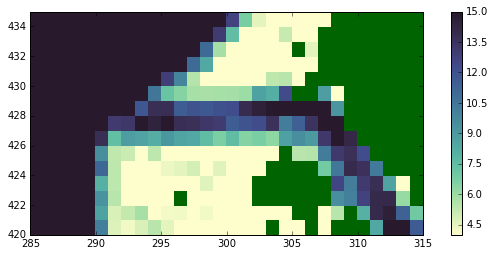

In [58]:
sj_masked = np.ma.masked_array(sj_bathy, sj_bathy == 0)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

vmax= 15
vmin = 4
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(sj_masked, cmap=cmap, vmax=vmax, vmin=vmin)
fig.colorbar(mesh, ax=ax)
ax.set_ylim((ibase+10, ibase+25))
ax.set_xlim((jbase-10, jbase+20));



In [59]:
x = np.arange(295, 309); jv_x = np.arange(295, 309); ju_x = 308
y = np.ones(14)*429; jv_y = np.ones(14)*429; ju_y = 429
print (x.shape, y.shape)
x = np.append(x, (308, 309)); jv_x = np.append(jv_x, 309); ju_x = np.append(ju_x, 309)
y = np.append(y, (428, 428)); jv_y = np.append(jv_y, 428); ju_y = np.append(ju_y, 428)
x = np.append(x, (309, 310)); jv_x = np.append(jv_x, 310); ju_x = np.append(ju_x, 310)
y = np.append(y, (427, 427)); jv_y = np.append(jv_y, 427); ju_y = np.append(ju_y, 427)
x = np.append(x, (310, 311)); jv_x = np.append(jv_x, 311); 
y = np.append(y, (426, 426)); jv_y = np.append(jv_y, 426); ju_y = np.append(ju_y, 426)
print (x.shape, y.shape, ju_x.shape)

# make the jetty 4m deep
for j,i in zip(y, x):
    if sj_bathy[int(j), i] > 4:
        sj_bathy[int(j), i] = 4

(14,) (14,)
(20,) (20,) (3,)


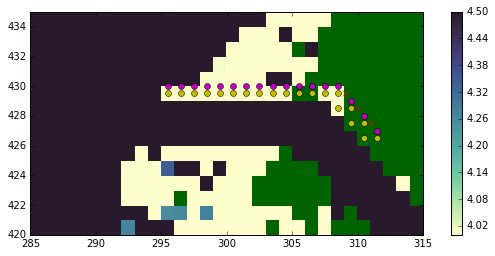

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

vmax=4.5
vmin = 4
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(sj_masked, cmap=cmap, vmax=vmax, vmin=vmin)
fig.colorbar(mesh, ax=ax)
ax.set_ylim((ibase+10, ibase+25))
ax.set_xlim((jbase-10, jbase+20));

for j,i in zip(y,x):
    ax.plot(i+0.5, j+0.5, 'oy')
for j,i in zip(jv_y, jv_x):
    ax.plot(i+0.5, j+1, 'om')
for j,i in zip(ju_y, ju_x):
    ax.plot(i+1, j+0.5, 'xr')
depth_check(sj_masked[:])

## Check Dredged Channel

In [99]:
dc_bathy = np.copy(sj_bathy[:])


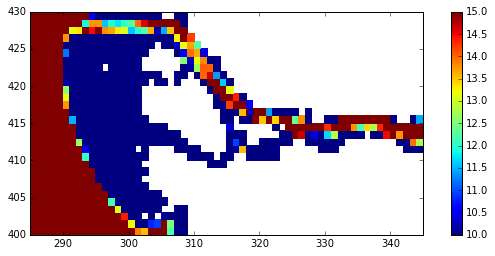

In [101]:
dc_masked = np.ma.masked_array(dc_bathy, dc_bathy == 0)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

vmax= 15
vmin = 10

viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(dc_masked, vmax=vmax, vmin=vmin)
fig.colorbar(mesh, ax=ax)
ax.set_ylim((ibase-10, ibase+20))
ax.set_xlim((jbase-10, jbase+50));
ax.plot(jbase+23+0.5, ibase+6+0.5, 'o')


According to: https://voony.files.wordpress.com/2012/10/gmtnauticalchart.jpg

it should be at least 10 m above datum = 13 m above msl deep north of Deas. So I'll make it continuous 13 m throughout.


In [63]:
store_dc = np.copy(dc_bathy)

In [64]:
dc_bathy[ibase+3, jbase+49] = 13
dc_bathy[ibase+3, jbase+48] = 13
dc_bathy[ibase+4, jbase+48] = 13
dc_bathy[ibase+4, jbase+43] = 13
dc_bathy[ibase+5, jbase+43] = 13
dc_bathy[ibase+5, jbase+42] = 13
dc_bathy[ibase+5, jbase+41] = 13
dc_bathy[ibase+5, jbase+40] = 13
dc_bathy[ibase+5, jbase+39] = 13
dc_bathy[ibase+5, jbase+37] = 13
dc_bathy[ibase+4, jbase+37] = 13
dc_bathy[ibase+4, jbase+36] = 13
dc_bathy[ibase+4, jbase+35] = 13
dc_bathy[ibase+4, jbase+34] = 13
dc_bathy[ibase+4, jbase+33] = 13
dc_bathy[ibase+4, jbase+32] = 13
dc_bathy[ibase+4, jbase+31] = 13
dc_bathy[ibase+4, jbase+30] = 13
dc_bathy[ibase+4, jbase+29] = 13
dc_bathy[ibase+5, jbase+29] = 13
dc_bathy[ibase+5, jbase+28] = 13
dc_bathy[ibase+5, jbase+27] = 13
dc_bathy[ibase+6, jbase+27] = 13
dc_bathy[ibase+6, jbase+26] = 13
dc_bathy[ibase+6, jbase+25] = 13
dc_bathy[ibase+6, jbase+22] = 13
dc_bathy[ibase+7, jbase+22] = 13
dc_bathy[ibase+7, jbase+21] = 13
dc_bathy[ibase+7, jbase+20] = 13
dc_bathy[ibase+8, jbase+20] = 13
dc_bathy[ibase+8, jbase+19] = 13
dc_bathy[ibase+9, jbase+19] = 13
dc_bathy[ibase+9, jbase+18] = 13
dc_bathy[ibase+10, jbase+18] = 13
dc_bathy[ibase+10, jbase+17] = 13
dc_bathy[ibase+11, jbase+17] = 13
dc_bathy[ibase+11, jbase+16] = 13
dc_bathy[ibase+12, jbase+16] = 13
dc_bathy[ibase+13, jbase+16] = 13
dc_bathy[ibase+13, jbase+15] = 13
dc_bathy[ibase+14, jbase+15] = 13
dc_bathy[ibase+14, jbase+14] = 13
dc_bathy[ibase+15, jbase+14] = 13
dc_bathy[ibase+16, jbase+14] = 13
dc_bathy[ibase+16, jbase+13] = 13
dc_bathy[ibase+17, jbase+13] = 13
dc_bathy[ibase+17, jbase+12] = 13
dc_bathy[ibase+18, jbase+12] = 13
dc_bathy[ibase+18, jbase+7:jbase+12] = 13
dc_bathy[ibase+18, jbase+6] = 13
dc_bathy[ibase+18, jbase+5] = 13
dc_bathy[ibase+18, jbase+4] = 13
dc_bathy[ibase+18, jbase+3] = 13
dc_bathy[ibase+17, jbase+3] = 13
dc_bathy[ibase+17, jbase+2] = 13
dc_bathy[ibase+17, jbase+1] = 13
dc_bathy[ibase+17, jbase] = 13
dc_bathy[ibase+17, jbase-1] = 13
dc_bathy[ibase+17, jbase-2] = 13

In [65]:
dc_bathy = np.maximum(dc_bathy, store_dc)

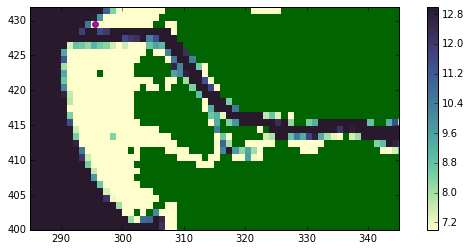

In [67]:
dc_masked = np.ma.masked_array(dc_bathy, dc_bathy == 0)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

vmax= 13
vmin = 7
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(dc_masked, cmap=cmap, vmax=vmax, vmin=vmin)
fig.colorbar(mesh, ax=ax)
ax.set_ylim((ibase-10, ibase+22))
ax.set_xlim((jbase-10, jbase+50));
ax.plot(x[0]+0.5, y[0]+0.5, 'om')

### Put Canoe Pass Back

In [68]:
# Not needed!
#dc_bathy[413, 298:303] = 4.
#dc_bathy[412, 298] = 4.

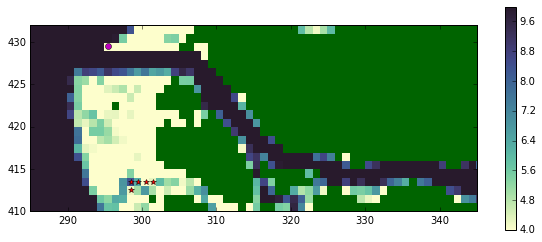

In [70]:
dc_masked = np.ma.masked_array(dc_bathy, dc_bathy == 0)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

vmax= 13
vmin = 7
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(dc_masked, cmap=cmap, vmax=10, vmin=4)
fig.colorbar(mesh, ax=ax)
ax.set_ylim((ibase, ibase+22))
ax.set_xlim((jbase-10, jbase+50));
ax.plot(x[0]+0.5, y[0]+0.5, 'om')
ax.plot(298.5, 412.5, 'r*')
ax.plot(np.arange(298.5, 302.5, 1), 413.5*np.ones(4), 'r*')

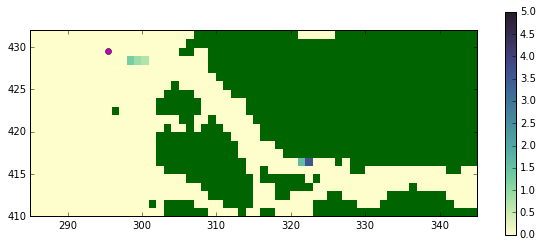

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

vmax= 5
vmin = 0
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(dc_masked-sj_masked, cmap=cmap, vmax=vmax, vmin=vmin)
fig.colorbar(mesh, ax=ax)
ax.set_ylim((ibase, ibase+22))
ax.set_xlim((jbase-10, jbase+50));
ax.plot(x[0]+0.5, y[0]+0.5, 'om')
depth_check(dc_masked[:])

### Middle Arm Connection

In [ ]:
# Not needed
#Fill = []
#for jj in range(313, 325):
#    for ii in range(430, 439):
#        Fill += [[jj+0.5, ii+0.5]]
#        if dc_bathy[ii, jj] > 4:
#            dc_bathy[ii, jj] = 4
#for jj in range(325, 329):
#    for ii in range(430, 436):
#        Fill += [[jj+0.5, ii+0.5]]
#        if dc_bathy[ii, jj] > 4:
#            dc_bathy[ii, jj] = 4
#Fill2 = [[329.5, 435.5], [326.5, 433.5]]
#dc_bathy[Fill2[0][1]-0.5, Fill2[0][0]-0.5] = 0.
#dc_bathy[Fill2[1][1]-0.5, Fill2[1][0]-0.5] = 0.
#dc_bathy[436:438, 316] = 4.

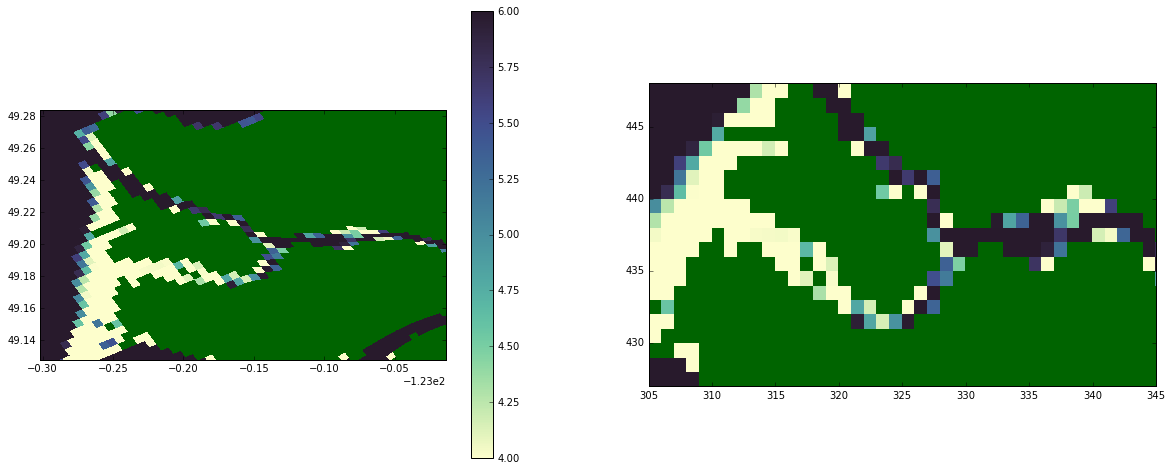

In [72]:
dc_masked = np.ma.masked_array(dc_bathy, dc_bathy == 0)
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
vmax= 6
vmin = 4
viz_tools.set_aspect(ax[0], coords='map')
viz_tools.set_aspect(ax[1], coords='grid')
mesh = ax[0].pcolormesh(lon, lat, dc_masked, cmap=cmap, vmax=vmax, vmin=vmin)
mesh = ax[1].pcolormesh(dc_masked, cmap=cmap, vmax=vmax, vmin=vmin)
fig.colorbar(mesh, ax=ax[0])
ax[0].set_ylim((lat[ibase+27, jbase-10], lat[ibase+38, jbase+50]))
ax[0].set_xlim((lon[ibase+52, jbase+20], lon[ibase+17, jbase+50]))
ax[1].set_ylim((ibase+17, ibase+38))
ax[1].set_xlim((jbase+10, jbase+50))
ax[1].plot([e1[0] for e1 in Fill], [e2[1] for e2 in Fill], 'ro')
ax[1].plot([e1[0] for e1 in Fill2], [e2[1] for e2 in Fill2], 'y*')

### Spits, Ferry Terminal and Coal Port

0.0058136 0.00183868


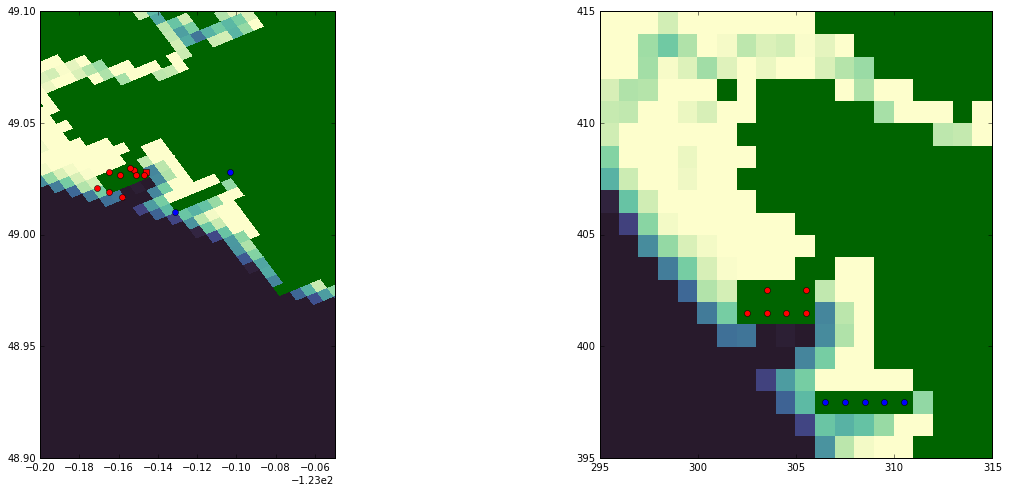

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
viz_tools.set_aspect(ax[0], coords='map')
viz_tools.set_aspect(ax[1])
ax[0].pcolormesh(lon[:], lat[:], dc_masked[:], cmap=cmap, vmax=20)
ax[1].pcolormesh(dc_masked[:], cmap=cmap, vmax=20)
ax[0].set_ylim((48.9, 49.1))
ax[0].set_xlim((-123.2, -123.05))
ax[1].set_ylim((395, 415))
ax[1].set_xlim((295, 315))
dlat = lat[430, 290] - lat[429, 289]
dlon = lon[430, 290] - lon[429, 289]
print(dlat, dlon)



# Tswassen Ferry Terminal
ax[0].plot(-123.132+dlon/2., 49.007+dlat/2., 'bo')
ax[0].plot(-123.104+dlon/2., 49.025+dlat/2., 'bo')
ax[1].plot(306+0.5, 397+0.5, 'bo')
ax[1].plot(307+0.5, 397+0.5, 'bo')
ax[1].plot(308+0.5, 397+0.5, 'bo')
ax[1].plot(309+0.5, 397+0.5, 'bo')
ax[1].plot(310+0.5, 397+0.5, 'bo')
dc_bathy[397, 306:311] = 0.

# Iona Spit
ax[0].plot(-123.263+dlon/2., 49.206+dlat/2., 'go')
ax[0].plot(-123.213+dlon/2., 49.216+dlat/2., 'go')
# Nothing to Do

# Iona/North Arm Spits
ax[0].plot(-123.255+dlon/2., 49.243+dlat/2., 'yo')
ax[0].plot(-123.228+dlon/2., 49.226+dlat/2., 'yo')
ax[0].plot(-123.267+dlon/2., 49.254+dlat/2., 'ko')
ax[1].plot(317+0.5, 450+0.5, 'yo')
ax[1].plot(316+0.5, 450+0.5, 'yo')
ax[1].plot(316+0.5, 451+0.5, 'yo')
ax[1].plot(317+0.5, 454+0.5, 'yo')
dc_bathy[450, 316:318] = 0.
dc_bathy[451, 316] = 0.
dc_bathy[454, 317] = 0.

# Coal Port
ax[0].plot(-123.153+dlon/2., 49.026+dlat/2., 'ro')
ax[0].plot(-123.152+dlon/2., 49.024+dlat/2., 'ro')
ax[0].plot(-123.147+dlon/2., 49.025+dlat/2., 'rs')
ax[0].plot(-123.159+dlon/2., 49.014+dlat/2., 'ro')
ax[0].plot(-123.166+dlon/2., 49.016+dlat/2., 'ro')
ax[0].plot(-123.172+dlon/2., 49.018+dlat/2., 'ro')
ax[0].plot(-123.166+dlon/2., 49.025+dlat/2., 'ro')
ax[0].plot(-123.160+dlon/2., 49.024+dlat/2., 'ro')
ax[0].plot(-123.148+dlon/2., 49.024+dlat/2., 'ro')
ax[0].plot(-123.155+dlon/2., 49.027+dlat/2., 'ro')

ax[1].plot(302+0.5, 401+0.5, 'ro')
ax[1].plot(303+0.5, 401+0.5, 'ro')
ax[1].plot(304+0.5, 401+0.5, 'ro')
ax[1].plot(305+0.5, 401+0.5, 'ro')
ax[1].plot(303+0.5, 402+0.5, 'ro')
ax[1].plot(305+0.5, 402+0.5, 'ro')
dc_bathy[401, 302:306] = 0.
dc_bathy[402, 303:306] = 0.
dc_masked = np.ma.masked_array(dc_bathy, dc_bathy == 0)

## Final Bathymetry

In [80]:
final_bathy = dc_masked

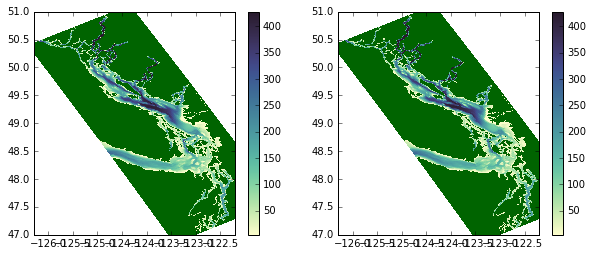

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
viz_tools.set_aspect(axs[0], coords='map')
mesh = axs[0].pcolormesh(lon[:], lat[:], md_bathy[:], cmap=cmap)
fig.colorbar(mesh, ax=axs[0])
axs[0].set_ylim(ylim)
axs[0].set_xlim(xlim)
viz_tools.set_aspect(axs[1], coords='map')
mesh = axs[1].pcolormesh(lon[:], lat[:], final_bathy[:], cmap=cmap)
fig.colorbar(mesh, ax=axs[1])
axs[1].set_ylim(ylim)
axs[1].set_xlim(xlim);

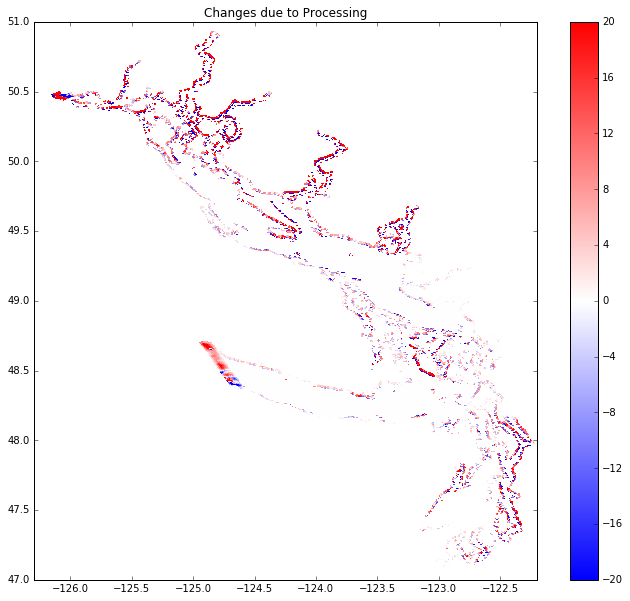

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
viz_tools.set_aspect(ax, coords='map')
mesh = ax.pcolormesh(lon[:], lat[:], final_bathy-np.array(md_bathy[:]), cmap='bwr', vmax=20, vmin=-20)
fig.colorbar(mesh, ax=ax)
ax.set_ylim(ylim)
ax.set_title('Changes due to Processing')
ax.set_xlim(xlim);

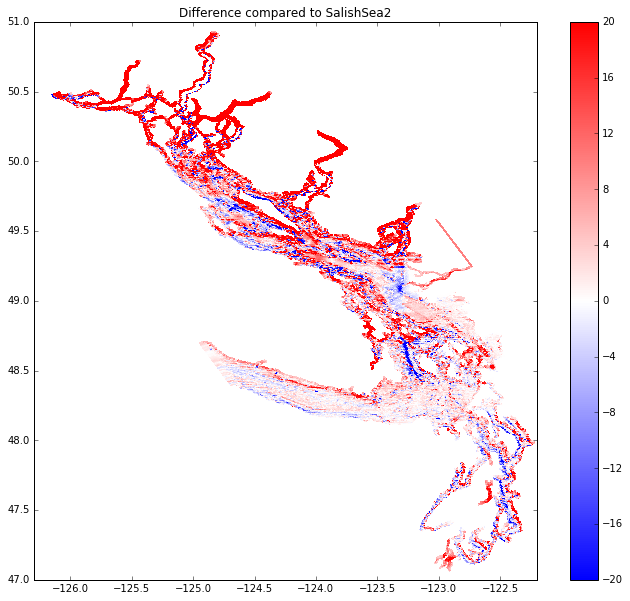

In [83]:
ss2_file = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
ss2_bathy = ss2_file.variables['Bathymetry']
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
viz_tools.set_aspect(ax, coords='map')
mesh = ax.pcolormesh(lon[:], lat[:], final_bathy-np.array(ss2_bathy[:]), cmap='bwr', vmax=20, vmin=-20)
fig.colorbar(mesh, ax=ax)
ax.set_title('Difference compared to SalishSea2')
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ss2_file.close()

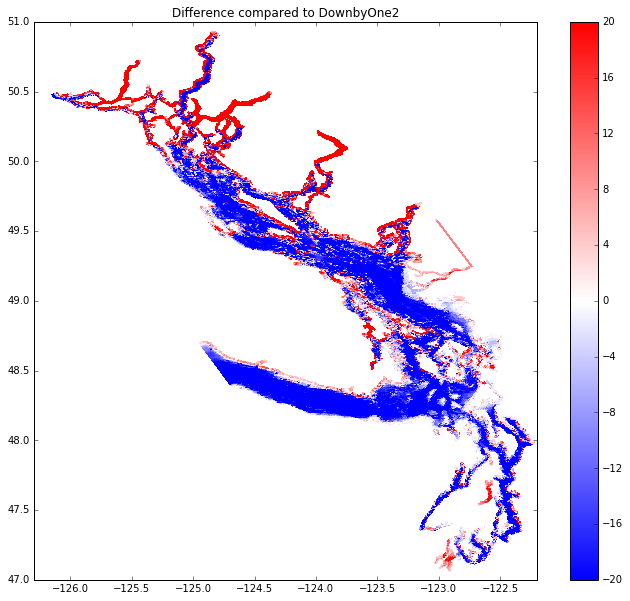

In [84]:
db1_file = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
db1_bathy = db1_file.variables['Bathymetry']
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
viz_tools.set_aspect(ax, coords='map')
mesh = ax.pcolormesh(lon[:], lat[:], final_bathy-np.array(db1_bathy[:]), cmap='bwr', vmax=20, vmin=-20)
fig.colorbar(mesh, ax=ax)
ax.set_title('Difference compared to DownbyOne2')
ax.set_ylim(ylim)
ax.set_xlim(xlim)
db1_file.close()

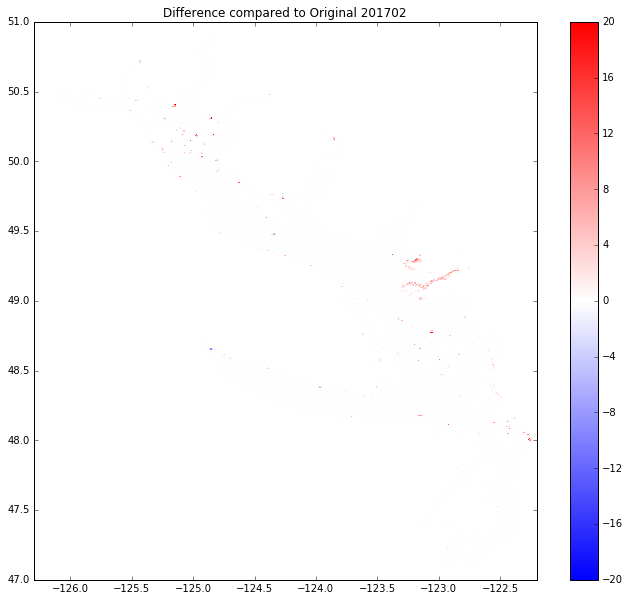

In [85]:
tos_file = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
tos_bathy = tos_file.variables['Bathymetry'][:]
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
viz_tools.set_aspect(ax, coords='map')
mesh = ax.pcolormesh(lon[:], lat[:], final_bathy-tos_bathy, cmap='bwr', vmax=20, vmin=-20)
fig.colorbar(mesh, ax=ax)
ax.set_title('Difference compared to Original 201702')
ax.set_ylim(ylim)
ax.set_xlim(xlim)
db1_file.close()

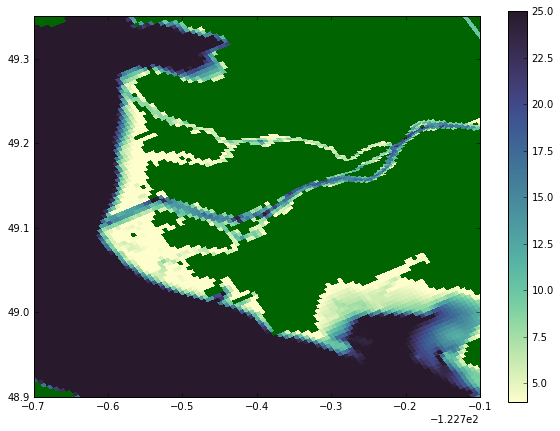

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
viz_tools.set_aspect(ax, coords='map')
mesh = ax.pcolormesh(lon[:], lat[:], final_bathy[:], cmap=cmap ,vmax=25, vmin=4)
fig.colorbar(mesh, ax=ax)
ax.set_ylim((48.9, 49.35))
ax.set_xlim((-123.4, -122.8));

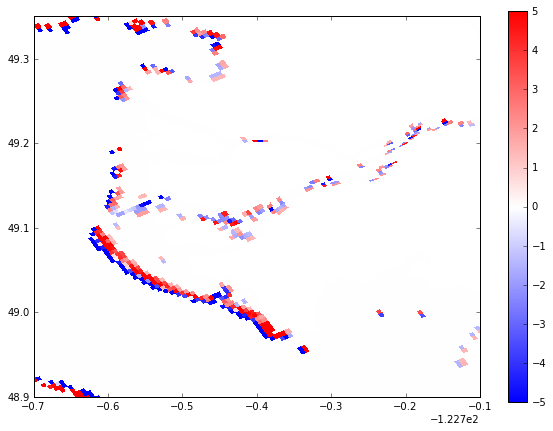

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
viz_tools.set_aspect(ax, coords='map')
mesh = ax.pcolormesh(lon[:], lat[:], final_bathy[:]-md_bathy[:], cmap='bwr' ,vmax=5, vmin=-5)
fig.colorbar(mesh, ax=ax)
ax.set_ylim((48.9, 49.35))
ax.set_xlim((-123.4, -122.8));

## Write out ##

In [88]:
nc_tools.show_dataset_attrs(md_bathyfile)

file format: NETCDF4


In [89]:
ysize = final_bathy.shape[0]; xsize = final_bathy.shape[1]
print (ysize, xsize)

898 398


In [90]:
bathy201803 = nc.Dataset('./bathymetry_201803c.nc', 'w')
bathy201803.createDimension('y', ysize)
bathy201803.createDimension('x', xsize)
nc_tools.show_dimensions(bathy201803)

<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 898

<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 398



In [91]:
newlons = bathy201803.createVariable('nav_lon', float, ('y', 'x'), zlib=True)
newlons.setncattr('units', 'degrees_east')
newlons.setncattr('long_name', 'longitude')
newlats = bathy201803.createVariable('nav_lat', float, ('y', 'x'), zlib=True)
newlats.setncattr('units', 'degrees_north')
newlats.setncattr('long_name', 'latitude')

newdepths = bathy201803.createVariable(
    'Bathymetry', float, ('y', 'x'), 
    zlib=True, least_significant_digit=0.1, fill_value=0)
newdepths.setncattr('units', 'metres')
newdepths.setncattr('long_name', 'sea_floor_depth')

newlons[:] = lon
newlats[:] = lat
newdepths[:] = final_bathy

In [92]:
nc_tools.init_dataset_attrs(bathy201803, 'Bathymetry 201803', 'Process201803Bathymetry',
                           'sea_initial/bathymetry_201803c.nc', 
                            'Bathymetry processed from Michaels New Full River Bathymetry with 2m crit. bank but deeper river')

file format: NETCDF4
Conventions: CF-1.6
title: Bathymetry 201803
institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
source: https://bitbucket.org/salishsea/tools/src/tip/Process201803Bathymetry.ipynb
references: REQUIRED
history: [2018-06-27 17:57:57] Created netCDF4 zlib=True dataset.
comment: Bathymetry processed from Michaels New Full River Bathymetry with 2m crit. bank but deeper river


In [93]:
bathy201803.setncattr('references', 'sea_initial/bathymetry_201803c.nc')

In [94]:
nc_tools.check_dataset_attrs(bathy201803)

In [95]:
nc_tools.show_dataset_attrs(bathy201803)

file format: NETCDF4
Conventions: CF-1.6
title: Bathymetry 201803
institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
source: https://bitbucket.org/salishsea/tools/src/tip/Process201803Bathymetry.ipynb
references: sea_initial/bathymetry_201803c.nc
history: [2018-06-27 17:57:57] Created netCDF4 zlib=True dataset.
comment: Bathymetry processed from Michaels New Full River Bathymetry with 2m crit. bank but deeper river


In [96]:
bathy201803.close()

## Jetty Mask ##

In [ ]:
mask_for_jetty_u = np.zeros_like(ns_bathy)
mask_for_jetty_v = np.zeros_like(ns_bathy)
for j, i in zip(jv_y, jv_x):
    mask_for_jetty_v[j, i]= 1.0
for j, i in zip(ju_y, ju_x):
    mask_for_jetty_u[j, i] = 1.0
fig, ax = plt.subplots(1, 3, figsize=(10,5))
viz_tools.set_aspect(ax[0])
viz_tools.set_aspect(ax[1])
viz_tools.set_aspect(ax[2])
ax[0].pcolormesh(final_bathy[380:450, 280:350], cmap='copper', vmax=25, vmin=3)
ax[1].pcolormesh(mask_for_jetty_u[380:450, 280:350], cmap='copper', vmax=1, vmin=0)
ax[2].pcolormesh(mask_for_jetty_v[380:450, 280:350], cmap='copper', vmax=1, vmin=0);

### Reduced Friction

In [ ]:
# this is a hack assuming rn_bfrien is set to 400!!!
value = -0.5/400.
imin, imax = 405, 460
jmin, jmax = 288+60, 398
for i in range(imin, imax):
    for j in range(jmin, jmax):
        if final_bathy[i, j] + final_bathy[i+1, j] > 2*4:
            mask_for_jetty_v[i, j] = value    # watch, v is in i-direction!
        if j+1 < 398 and final_bathy[i, j] + final_bathy[i, j+1] > 2*4:
            mask_for_jetty_u[i, j] = value
            
imin, imax = 405, 450
jmin, jmax = 318, 288+60
for i in range(imin, imax):
    for j in range(jmin, jmax):
        if final_bathy[i, j] + final_bathy[i+1, j] > 2*4:
            mask_for_jetty_v[i, j] = value    # watch, v is in i-direction!
        if final_bathy[i, j] + final_bathy[i, j+1] > 2*4:
            mask_for_jetty_u[i, j] = value
imin, imax = 438, 455
jmin, jmax = 315, 328
for i in range(imin, imax):
    for j in range(jmin, jmax):
        if final_bathy[i, j] + final_bathy[i+1, j] > 2*4:
            mask_for_jetty_v[i, j] = value    # watch, v is in i-direction!
        if final_bathy[i, j] + final_bathy[i, j+1] > 2*4:
            mask_for_jetty_u[i, j] = value
imin, imax = 408, 429
jmin, jmax = 288+8, 325
for i in range(imin, imax):
    for j in range(jmin, jmax):
        if final_bathy[i, j] + final_bathy[i+1, j] > 2*4:
            mask_for_jetty_v[i, j] = value    # watch, v is in i-direction!
        if final_bathy[i, j] + final_bathy[i, j+1] > 2*4:
            mask_for_jetty_u[i, j] = value
imin, imax = 425, 429
jmin, jmax = 288+4, 288+15
for i in range(imin, imax):
    for j in range(jmin, jmax):
        if final_bathy[i, j] + final_bathy[i, j+1] > 2*4:
            mask_for_jetty_u[i, j] = value
imin, imax = 380, 460
jmin, jmax = 288, 398
fig, ax = plt.subplots(1, 3, figsize=(15, 7))
viz_tools.set_aspect(ax[0])
viz_tools.set_aspect(ax[1])
viz_tools.set_aspect(ax[2])
mesh = ax[0].pcolormesh(final_bathy[imin:imax, jmin:jmax], cmap='copper', vmax=30, vmin=4)
fig.colorbar(mesh, ax=ax[0])
mesh = ax[1].pcolormesh(mask_for_jetty_u[imin:imax, jmin:jmax], cmap='copper', vmax=-value, vmin=value)
fig.colorbar(mesh, ax=ax[1])
mesh = ax[2].pcolormesh(mask_for_jetty_v[imin:imax, jmin:jmax], cmap='copper', vmax=-value, vmin=value)
fig.colorbar(mesh, ax=ax[2]);
value

In [ ]:
jetty_mask = nc.Dataset('./jetty_mask_bathy201702_rbf.nc', 'w')
jetty_mask.createDimension('y', ysize)
jetty_mask.createDimension('x', xsize)
nc_tools.show_dimensions(jetty_mask)

In [ ]:
newlons = jetty_mask.createVariable('nav_lon', float, ('y', 'x'), zlib=True)
newlons.setncattr('units', 'degrees_east')
newlons.setncattr('long_name', 'longitude')
newlats = jetty_mask.createVariable('nav_lat', float, ('y', 'x'), zlib=True)
newlats.setncattr('units', 'degrees_north')
newlats.setncattr('long_name', 'latitude')

friction_mask_u = jetty_mask.createVariable(
    'bfr_coef_u', float, ('y', 'x'), 
    zlib=True, fill_value=-99)
friction_mask_u.setncattr('units', 'none')
friction_mask_u.setncattr('long_name', 'friction_x_binary_mask')
friction_mask_v = jetty_mask.createVariable(
    'bfr_coef_v', float, ('y', 'x'), 
    zlib=True, fill_value=-99)
friction_mask_v.setncattr('units', 'none')
friction_mask_v.setncattr('long_name', 'friction_y_binary_mask')

In [ ]:
newlons[:] = lon
newlats[:] = lat
friction_mask_u[:] = mask_for_jetty_u[:]
friction_mask_v[:] = mask_for_jetty_v[:]
print(np.min(mask_for_jetty_u))
print(np.min(friction_mask_u[:]))

In [ ]:
nc_tools.init_dataset_attrs(jetty_mask, 'Jetty Mask for Bathy 201702 reduced bottom friction', 'ProcessNewRiverBathymetry',
                           'sea_initial/v201702_alternate_bathys/jetty_mask_bathy201702_rbf', 
                            'Bathymetry processed from Michaels New Full River Bathymetry reduced bottom friction')

In [ ]:
jetty_mask.setncattr('references', 'sea_initial/v201702_alternate_bathys/jetty_mask_bathy201702_rbf.nc')

In [ ]:
nc_tools.check_dataset_attrs(jetty_mask)

In [ ]:
nc_tools.show_dataset_attrs(jetty_mask)

In [ ]:
jetty_mask.close()

In [ ]:
di = 50; dj=50
imin = 0; jmin = 80
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(final_bathy[:], cmap=cmap, vmax=25)
fig.colorbar(mesh, ax=ax)
ax.set_ylim((imin, imin+di))
ax.set_xlim((jmin, jmin+dj))
plt.plot(180+0.5, 807+0.5, 'rx')
plt.plot(99+0.5, 867+0.5, 'rx')

print (lat[465, 226], lon[465, 226])

In [ ]:
original_file = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
new_file = nc.Dataset('./bathymetry_201702b.nc')
deptho = original_file.variables['Bathymetry']
depthn = new_file.variables['Bathymetry']

In [ ]:
for i in range(898):
    for j in range(398):
        if (depthn[i, j] != deptho[i, j]):
            print(i, j, depthn[i, j], deptho[i, j])
            if (abs(depthn[i,j]-deptho[i,j]) > 1):
                print('****')

In [ ]:
di=100; dj=100
fig, axs = plt.subplots(36, 3, figsize=(15, 180))
plot = 0
for row in range(9):
    i = di*row
    for column in range(4):
        j = dj*column
        axs[plot, 0].pcolormesh(deptho[i:i+di, j:j+dj], cmap=cmap, vmax=50)
        axs[plot, 1].pcolormesh(depthn[i:i+di, j:j+dj], cmap=cmap, vmax=50)
        axs[plot, 2].pcolormesh(np.array(depthn[i:i+di, j:j+dj]) - 
                                np.array(deptho[i:i+di, j:j+dj]), cmap='bwr', vmax=10, vmin=-10)
        axs[plot, 0].set_title('At '+str(i)+' and '+str(j))
        plot += 1

In [ ]:
original_file.close()
new_file.close()